In [47]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  
from PIL import Image  
import requests
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

In [2]:
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

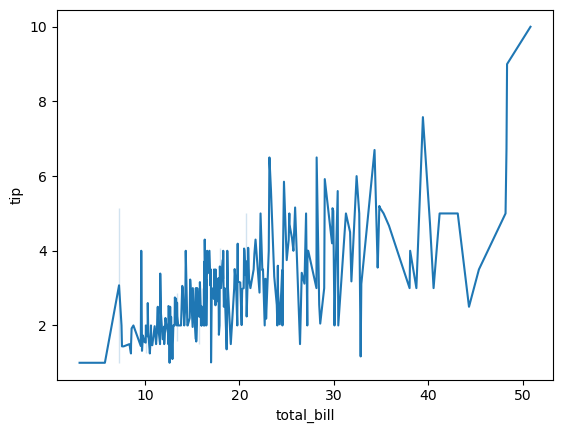

In [3]:
sns.lineplot(data=tips,
            x='total_bill',
            y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

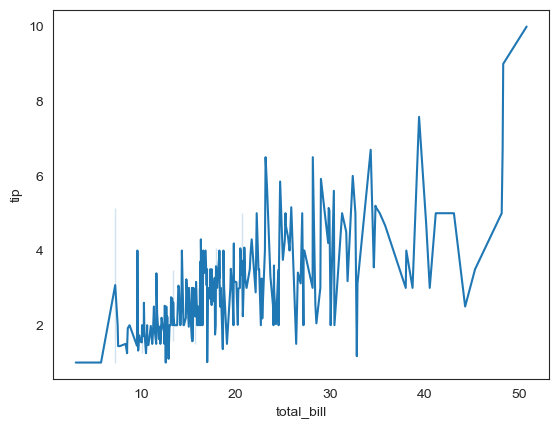

In [53]:
#Add premade style
sns.set_style('white')

sns.lineplot(data=tips, #choose our dataset
            x='total_bill', #define our x variable
            y='tip') #define our y variable

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

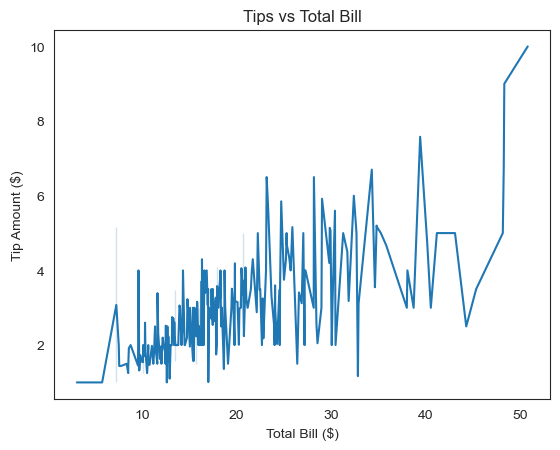

In [8]:
#Add labels using set.function
tipgraph = sns.lineplot(data=tips,
            x='total_bill',
            y='tip')

tipgraph.set(title = 'Tips vs Total Bill',
            xlabel = 'Total Bill ($)',
            ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

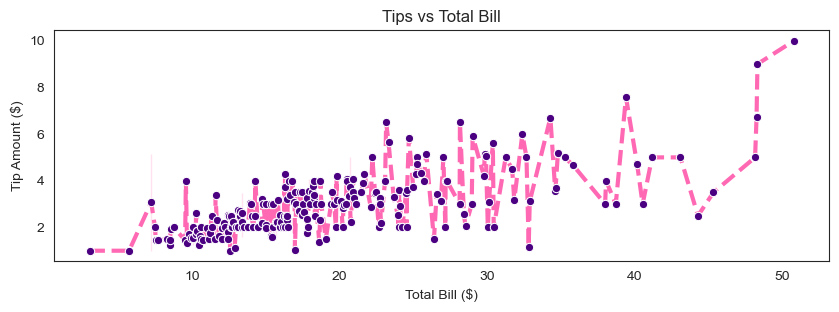

In [54]:
# Create a subplot with a specific figure size
fig = plt.subplots(figsize=(10,3))

# Generate a line plot with customized appearance
tipgraph = sns.lineplot(data=tips,
            x='total_bill',
            y='tip',
            color = 'hotpink',
            linestyle = '--',
            linewidth = 3,
            marker = 'o',
            markerfacecolor = 'indigo')

# Set the title and axis labels for the plot
tipgraph.set(title = 'Tips vs Total Bill',
            xlabel = 'Total Bill ($)',
            ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

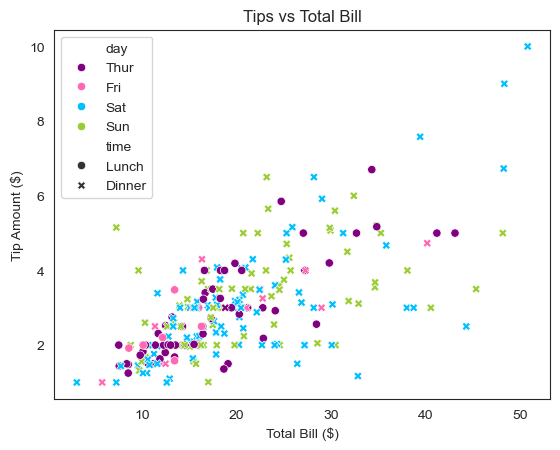

In [55]:
# Create a scatter plot with Seaborn using the 'tips' dataset
tipgraph = sns.scatterplot(data=tips,
            x='total_bill',
            y='tip',
            style = 'time',
            hue = 'day',
            palette = ['purple',
                       'hotpink',
                       'deepskyblue',
                       'yellowgreen' ])

# Set the title and axis labels for the plot
tipgraph.set(title = 'Tips vs Total Bill',
            xlabel = 'Total Bill ($)',
            ylabel = 'Tip Amount ($)')

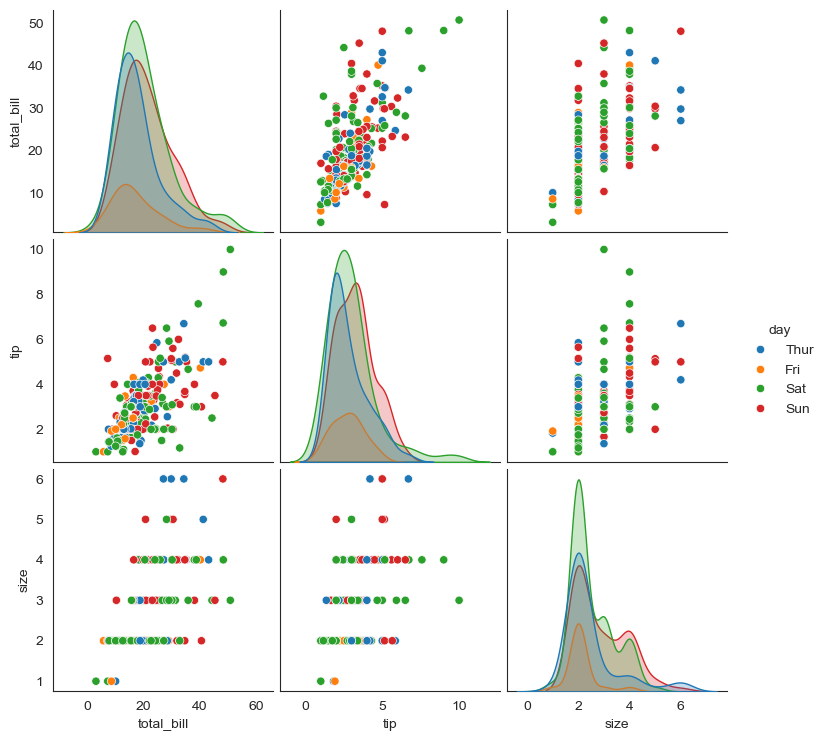

In [11]:
#Add pairplot
sns.pairplot(data=tips,
            hue = 'day')

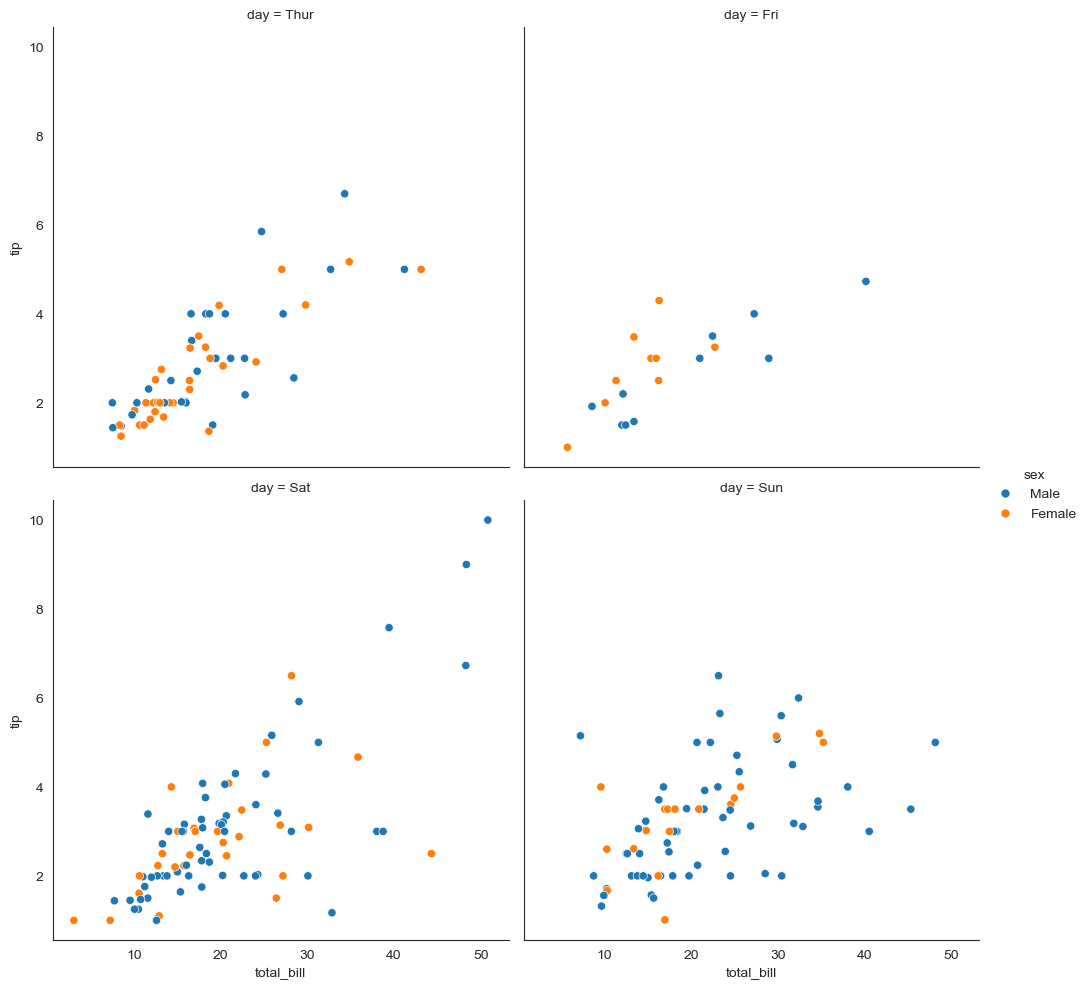

In [56]:
# Create a relational plot (scatter plot) using Seaborn's relplot function
sns.relplot(data=tips,
            x='total_bill',
            y='tip',
            hue='sex',
            col='day',
            kind='scatter',
            col_wrap=2)

# Show the plot
plt.show()


In [21]:
import plotly.graph_objects as go  # 'go' is 'graph objects'

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])


In [22]:
# Create a new figure 
graph = go.Figure()

# Add a bar trace to the figure
graph.add_trace(go.Bar(x=x1, y=y1))

# Update the layout of the figure to add titles and labels
graph.update_layout(title = "Pirate Scores",
                 xaxis_title = "Pirates",
                 yaxis_title = "Score")

In [57]:
graph = go.Figure()

# Add a scatter trace to the figure
graph.add_trace(go.Scatter(
    x=x1, 
    y=y1,
    mode = 'markers',
    marker = dict(
        size = 15,
        color = 'hotpink',
        opacity = 1,
        line = dict(width = 5, color = 'purple')
    )
    ))

# Update the layout of the figure to add titles and adjust size
graph.update_layout(
    title = "Interactive Pirate Scores",
    xaxis_title = "Pirates",
    yaxis_title = "Score",
    width = 500,
    height = 500
    )
    

In [58]:
# Load data from a CSV file hosted online into a Pandas DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv", 
                 on_bad_lines='skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


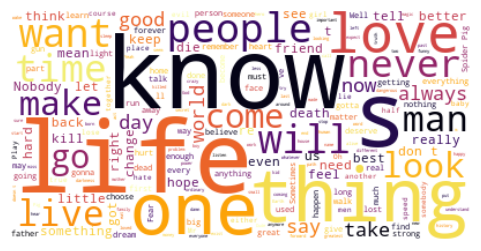

In [42]:
# Join all our text from each row from our quote column into a single string
text = " ".join(each for each in df.quote)

# Generate our word cloud image
wordcloud = WordCloud(background_color="white", colormap='inferno').generate(text)

# Use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")  # This line removes the axis
plt.show()

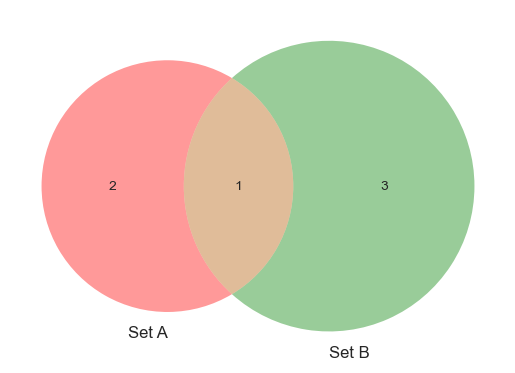

In [48]:
# Define our sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# Create the Venn diagram
venn2([A, B], ('Set A', 'Set B'))
plt.show()

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/matplotlib_venn/_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



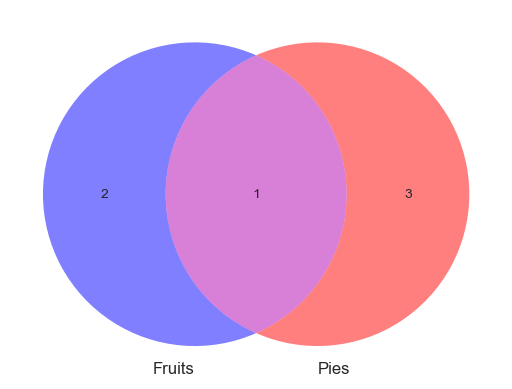

In [49]:
# Define our sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# Create the Venn diagram
diagram = venn2_unweighted([A, B],
                           set_labels=('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)

plt.show()

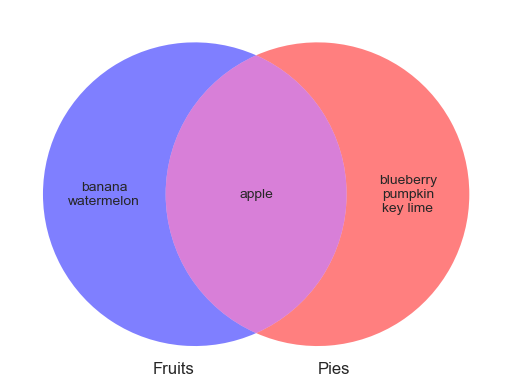

In [52]:
# Define our sets
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# Create the Venn diagram
diagram = venn2_unweighted([A, B],
                           set_labels=('Fruits', 'Pies'),
                           set_colors=("blue", "red"),
                           alpha=0.5)
# Assuming 'diagram' is the Venn diagram object created earlier
diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))

plt.show()